In [1]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace = True)
    df['Embarked'].fillna('N',inplace = True)
    df['Fare'].fillna(0,inplace = True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace = True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin']=df.Cabin.str[0]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
    #정확도,정밀도,재현율,confusion matrix
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}')



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:

df = pd.read_csv('titanic_train.csv')
y = df.Survived
x = df.drop(columns=['Survived'])
x = transform_features(x)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
lr_clf = LogisticRegression(max_iter=150)
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

In [6]:
pred_proba = lr_clf.predict_proba(X_test) #임계값=0.5 (예측확률이 0.5보다 크면 positive로 , 작으면 negative로 예측)

In [7]:
pred_proba

array([[0.46203017, 0.53796983],
       [0.87872733, 0.12127267],
       [0.87717511, 0.12282489],
       [0.88251544, 0.11748456],
       [0.85526601, 0.14473399],
       [0.88216984, 0.11783016],
       [0.88846031, 0.11153969],
       [0.20877482, 0.79122518],
       [0.78289495, 0.21710505],
       [0.36914729, 0.63085271],
       [0.89973075, 0.10026925],
       [0.87508071, 0.12491929],
       [0.87716914, 0.12283086],
       [0.88841448, 0.11158552],
       [0.43698012, 0.56301988],
       [0.85905344, 0.14094656],
       [0.90373136, 0.09626864],
       [0.73345034, 0.26654966],
       [0.72478645, 0.27521355],
       [0.17162115, 0.82837885],
       [0.75361145, 0.24638855],
       [0.61897074, 0.38102926],
       [0.85469626, 0.14530374],
       [0.8146844 , 0.1853156 ],
       [0.88804438, 0.11195562],
       [0.76550859, 0.23449141],
       [0.8596044 , 0.1403956 ],
       [0.92580965, 0.07419035],
       [0.71963478, 0.28036522],
       [0.69554739, 0.30445261],
       [0.

In [8]:
import numpy as np

In [9]:
np.concatenate((pred.reshape(-1,1),pred_proba),axis = 1)

array([[1.        , 0.46203017, 0.53796983],
       [0.        , 0.87872733, 0.12127267],
       [0.        , 0.87717511, 0.12282489],
       [0.        , 0.88251544, 0.11748456],
       [0.        , 0.85526601, 0.14473399],
       [0.        , 0.88216984, 0.11783016],
       [0.        , 0.88846031, 0.11153969],
       [1.        , 0.20877482, 0.79122518],
       [0.        , 0.78289495, 0.21710505],
       [1.        , 0.36914729, 0.63085271],
       [0.        , 0.89973075, 0.10026925],
       [0.        , 0.87508071, 0.12491929],
       [0.        , 0.87716914, 0.12283086],
       [0.        , 0.88841448, 0.11158552],
       [1.        , 0.43698012, 0.56301988],
       [0.        , 0.85905344, 0.14094656],
       [0.        , 0.90373136, 0.09626864],
       [0.        , 0.73345034, 0.26654966],
       [0.        , 0.72478645, 0.27521355],
       [1.        , 0.17162115, 0.82837885],
       [0.        , 0.75361145, 0.24638855],
       [0.        , 0.61897074, 0.38102926],
       [0.

In [10]:
from sklearn.preprocessing import Binarizer

In [11]:
X=[[1,-1,2],[2,0,0],[0,1.1,1.2]]
binarizer = Binarizer(threshold=0.0) #임계치를 0.0으로 설정 (0.0보다 크면 1, 작으면 0)
binarizer.fit_transform(X)


array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

In [12]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
pred_proba_1

array([[0.53796983],
       [0.12127267],
       [0.12282489],
       [0.11748456],
       [0.14473399],
       [0.11783016],
       [0.11153969],
       [0.79122518],
       [0.21710505],
       [0.63085271],
       [0.10026925],
       [0.12491929],
       [0.12283086],
       [0.11158552],
       [0.56301988],
       [0.14094656],
       [0.09626864],
       [0.26654966],
       [0.27521355],
       [0.82837885],
       [0.24638855],
       [0.38102926],
       [0.14530374],
       [0.1853156 ],
       [0.11195562],
       [0.23449141],
       [0.1403956 ],
       [0.07419035],
       [0.28036522],
       [0.30445261],
       [0.94719648],
       [0.81716798],
       [0.12693137],
       [0.82616571],
       [0.39948986],
       [0.23449141],
       [0.07240414],
       [0.61088913],
       [0.05292686],
       [0.10388615],
       [0.35096077],
       [0.083397  ],
       [0.82163734],
       [0.70780006],
       [0.63043679],
       [0.63045305],
       [0.91887122],
       [0.359

In [13]:
binarizer = Binarizer(threshold = custom_threshold)
custom_pred = binarizer.fit_transform(pred_proba_1)
custom_pred

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [ ]:
def get_clf_eval(y_test,pred,pred_proba=None):
    from sklearn.metrics import accuracy_score.precision_score,recall_score,confusion_matrix,f1_score
    #정확도,정밀도,재현율,confusion matrix
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f},f1:{f1:.4f}')

In [14]:
get_clf_eval(y_test,custom_pred)

InvalidParameterError: The 'y_score' parameter of roc_auc_score must be an array-like. Got None instead.

In [ ]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold)
custom_pred = binarizer.fit_transform(pred_proba_1)
get_clf_eval(y_test,custom_pred)

오차행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361,f1:0.7727


In [ ]:
custom_thresholds = [0.4,0.45,0.5,0.55,0.6]
def get_eval_by_threshold(y_test,pred_proba_c1,custom_thresholds):
    for custom_threshold in custom_thresholds:
        binarizer = Binarizer(threshold = custom_threshold)
        custom_pred = binarizer.fit_transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_pred,pred_proba_c1)



In [ ]:
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),custom_thresholds)

NameError: name 'pred_proba' is not defined

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

In [ ]:
print(pred_proba_c1.shape)
print(y_test.shape)

(179,)
(179,)


In [ ]:
precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)

In [ ]:
print(precisions.shape,recalls.shape,thresholds.shape)

(166,) (166,) (165,)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

-0.036046580295313456 1.0127265645417465


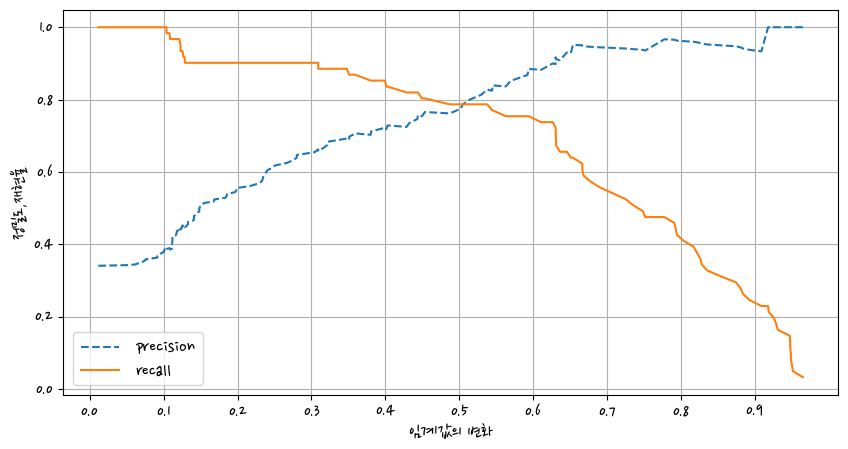

In [ ]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    import matplotlib.pyplot as plt
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)
    threshold_boundary = thresholds.shape[0]
    plt.figure(figsize = (10,5))
    plt.plot(thresholds,precisions[:-1],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[:-1],label='recall')
    start,end = plt.xlim()
    print(start,end)
    plt.xticks(np.round(np.arange(0,1,0.1),2))
    plt.grid()
    plt.legend()
    plt.xlabel('임계값의 변화')
    plt.ylabel('정밀도,재현율')

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [ ]:
def get_clf_eval(y_test,pred,pred_proba=None):
    from sklearn.metrics import accuracy_score.precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score
    #정확도,정밀도,재현율,confusion matrix
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f},f1:{f1:.4f},auc:{roc_auc:.4f}')



In [ ]:
custom_thresholds = [0.4,0.45,0.5,0.55,0.6]
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),custom_thresholds)

임계값: 0.4
오차행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361,f1:0.7727
임계값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033,f1:0.7840
임계값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869,f1:0.7805
임계값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541,f1:0.7931
임계값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377,f1:0.8036
